# Example of forecasting

In [40]:
%load_ext autoreload
%autoreload 2
from fgbuster.pysm_helpers import get_instrument, get_sky
import healpy as hp
import numpy as np
from fgbuster.cosmology import xForecast

nside = 64
# define sky and foregrounds simulations
sky = get_sky(nside, 'd0s0')
# define instrument
instrument = get_instrument(nside, 'cmbs4')
# get noiseless frequency maps
freq_maps = instrument.observe(sky, write_outputs=False)[0]
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0020.00 | 16.66 | 13.60 | 00.00 
0030.00 | 10.62 | 08.67 | 00.00 
0040.00 | 10.07 | 08.22 | 00.00 
0085.00 | 02.01 | 01.64 | 00.00 
0095.00 | 01.59 | 01.30 | 00.00 
0145.00 | 04.53 | 02.03 | 00.00 
0155.00 | 04.53 | 02.03 | 00.00 
0220.00 | 11.61 | 05.19 | 00.00 
0270.00 | 15.84 | 07.08 | 00.00 
Instrument attribute 'pixel_indices' not set.


In [44]:
# create 3% circular sky mask
RA = 2*np.pi-70.*np.pi/180
DEC = np.pi/2+70.*np.pi/180
radius = 34*np.pi/180
mask_circular = np.zeros(12*nside**2)
for ipix in range(12*nside**2):
    theta, phi = hp.pix2ang(nside, ipix)
    if (((phi - RA)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
    if (((phi - RA+2*np.pi)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
# applying mask to observed frequency maps
freq_maps[...,mask_circular==0] = 0.0

In [49]:
# define components used in the modeling
from fgbuster.component_model import CMB, Dust, Synchrotron
components = [CMB(), Dust(150.), Synchrotron(150.)]

('fsky = ', 0.030192057291666668)
======= ESTIMATION OF SPECTRAL PARAMETERS =======
('res.x = ', array([ 1.54, 20.  , -3.  ]))
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
('bounds on r = ', 0.0009862521794868784, ' / ', 0.0010328281259410286)
('starting point = ', 0.0010092715146305707)
('    ===>> fitted r = ', array([0.00099999]))
======= ESTIMATION OF SIGMA(R) =======
('ind_sr_min = ', 1)
('sr_grid[ind_sr_min-1] = ', 0.000999994878862331)
('sr_grid[ind_sr_min+1] = ', 0.0017782710621246085)
('sr_grid = ', array([9.99994879e-04, 1.33351489e-03, 1.77827106e-03, 2.37136308e-03,
       3.16226416e-03, 4.21694794e-03, 5.62339165e-03, 7.49891489e-03,
       9.99996586e-03, 1.33351716e-02, 1.77827410e-02, 2.37136713e-02,
       3.16226956e-02, 4.21695514e-02, 5.62340125e-02, 7.49892769e-02,
       9.99998293e-02, 1.33351944e-01, 1.77827713e-01, 2

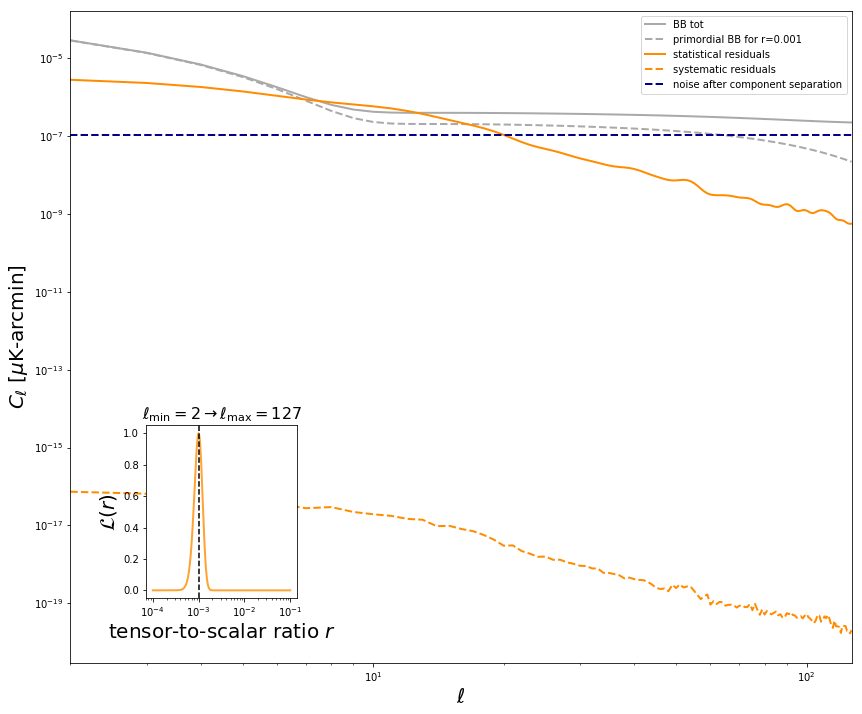

In [52]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and Alens=0.1
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, Alens=0.1, r=0.001, make_figure=True)